In [1]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_results(l):
    fig, ax = plt.subplots(1, 1, figsize=(9, 5))

    ax.set_title(f'Per Period Regret vs Rounds for f-dsw-ts with l={l}')
    ax.set_xlabel('Rounds')
    ax.set_ylabel('Regret')

    for noise in (0.0, 0.1, 0.5, 1.0, 10.0):
        base_path = f'../../../../results/f-dsw-ts-experiment-vs-noise/49/noise:{noise}_l:{l}/'
        df = pd.read_parquet(base_path + 'per_period_regret.parquet')

        ax.plot(df['per_period_regret'])
    ax.legend(['noise = 0.0', 'noise = 0.1', 'noise = 0.5', 'noise = 1.0', 'noise = 10.0']);

## Анализ устойчивости алгоритма f-dsw-ts в зависимости от размера вносимого в его параметры равномерного шума

**Предмет исследования:**
Исследуется устойчивость алгоритма f-dsw-ts относительно внесения в его параметры равномерного шума $noise \sim U(0, w)$. Размер вносимого шума $w$ регулируется в нескольких триалах. Также оценивается влияние одновременно выбираемых ручек $l$ на значение регрета при различных значениях $w$.


**Экспериментальная установка**
- Алгоритм: *f-dsw-ts*
- Модель пользователя: *sudden_bandit*
- Гиперпараметр *window_size*: 50
- Гиперпараметр $\gamma$: 0.99
- Параметризация модели пользователя: 
    -  первоначальная: [0.0, 0.0, 0.1, 0.3]
    -  после 250 раунда: [0.7, 0.0, 0.1, 0.3]
    -  после 500 раунда: [0.7, 0.9, 0.1, 0.3]
- Число одновременно выбираемых ручек $l$: [1, 2, 3] (применяется для каждого значения $w$)
- Количество раундов в рамках одного триала: *2000*
- Число триалов для каждой комбинации параметров *$w$* и $l$: *300*


**Варьируемый параметр:**
-  $w$: [0.0, 0.1, 0.5, 1.0, 10.0]


**Алгоритм внесения шума в параметры:**
- В конце каждого раунда в historic_trace и hot_trace параметры добавляется матрица со сгенерированным равномерным шумом той же размерности, то есть
    - historic_trace_params += np.random.random(size=(M, 2)) * w
    - hot_trace_params += np.random.random(size=(M, 2)) * w


Эксперимент реализован средствами MLDev, конфигурация доступна [здесь](https://gitlab.com/mlrep/mldev-recommender-systems/-/tree/anton_experiments/experiments/anton_experiments/experiment_1/series_3).

## Визуализация результатов эксперимента

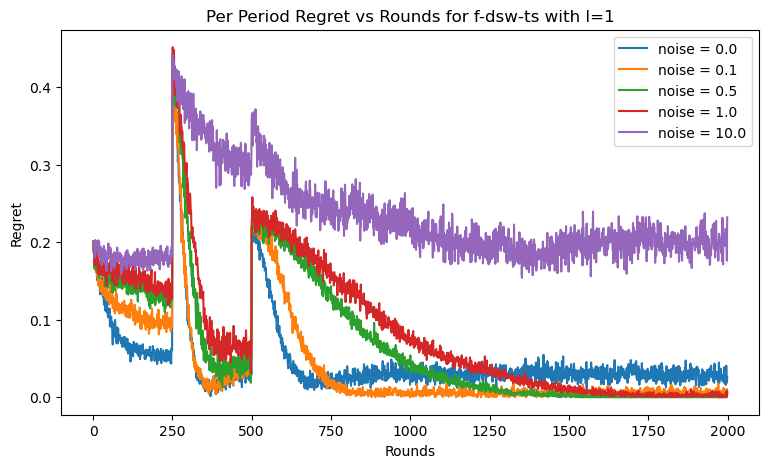

In [2]:
plot_results(1)

Рассмотрим график регрета при $l=1$. 

- Прослеживается следующая зависимость "чем больше размер вносимого шума, тем позже зашумленные варианты достигают того же значения регрета, что и бесшумный алгоритм (синяя кривая)"
- Интересно то, что кривые, соответствующие значениям шума $w\in \{0.1, 0.5, 1.0\}$, достигают "на дистанции" лучшего значения регрета, нежели синяя кривая

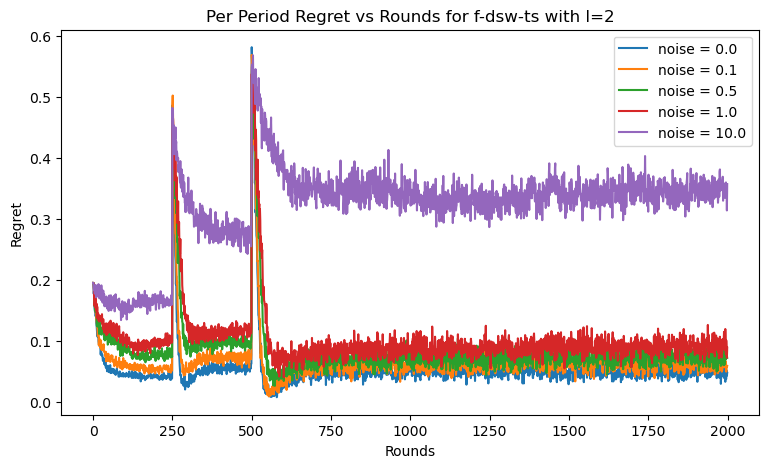

In [3]:
plot_results(2)

Рассмотрим график регрета при $l=2$. 

Здесь уже полностью соблюдается зависимость "чем больше шум, тем большее значение принимает регрет"

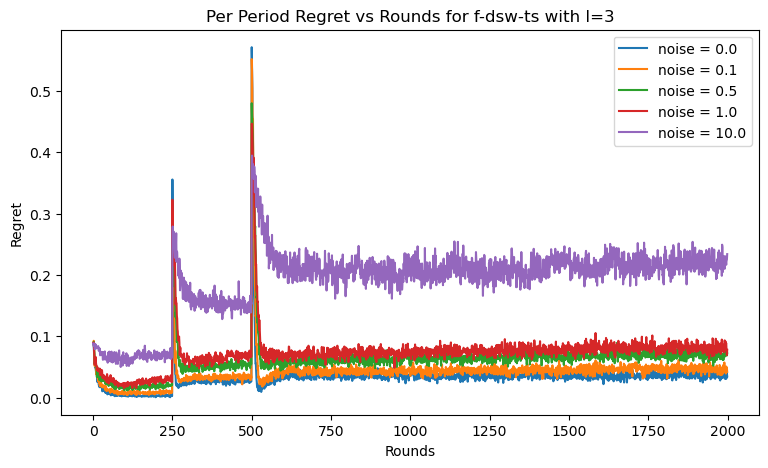

In [4]:
plot_results(3)

При $l=3$ характер результатов полностью аналогичен случаю с $l=2$

## Выводы

- При $l=\{2, 3\}$ величина вносимого шума обратно пропорциональна значению регрета
- При $l=1$ до ~750 раунда лучшее значение регрета достигает бесшумный алгоритм, однако далее его последовательно опережают зашумленные вариации с $w=\{0.1, 0.5, 1.0\}$, соответственно
- При $w=10.0$ алгоритм сильно теряет в качестве


Таким образом, внесение небольшого равномерного шума, как показывает эксперимент, может помочь алгоритму f-dsw-ts достичь лучшего качества. При этом прирост в качестве наблюдается спустя некоторое число раундов. 